# Exploration of berries prices in the spanish market

## Prices exploration

### Cleanance

In [1]:
import pyodbc
import pandas as pd
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
connStr = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=bipro02\\adminbi;DATABASE=Prices;Trusted_Connection=yes')
cursor = connStr.cursor()

qry = "SELECT * FROM [Prices].[dbo].[prices] where cast([Country] as nvarchar) = cast('ES' as nvarchar)"
df_prices = pd.read_sql(qry, connStr)

df_prices.shape

(452, 14)

In [8]:
# Dates in campaign time format
# df_prices['Campaign_Date'] = df_prices['Year_campaign'].astype(str) + df_prices['Week_num_campaign'].astype(str)
# https://stackoverflow.com/questions/17087314/get-date-from-week-number
# df_prices['Campaign_Date'] = df_prices['Campaign_Date'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y%W-%w"))

# Dates natural date format
blue = df_prices[(df_prices.Product=='BLUEBERRIES') & (df_prices.Campaign>2015) & (df_prices.Campaign_wk<50)][['Date_price', 'Price']]
blue.set_index('Date_price',inplace=True)
blue.sort_index(inplace=True)
blue.index = blue.index.astype('datetime64[ns]') 
blue_weeks = blue.resample('W').mean().asfreq('W')
rows_null = blue_weeks.isnull()
idx_null = rows_null[rows_null.any(axis=1)].index
blue_full = blue_weeks.interpolate()


### Ploting

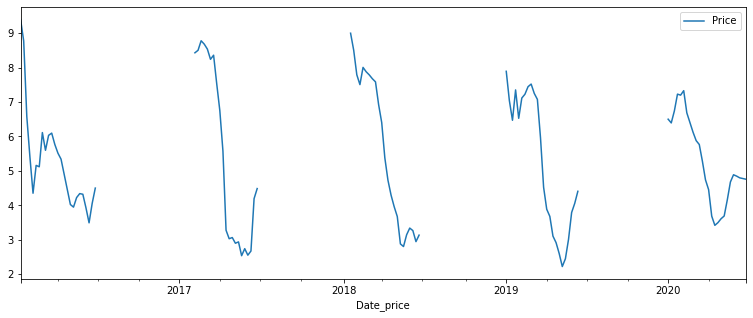

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting blue_weeks, without interpolation as it is our real data
fig, ax = plt.subplots(figsize= (13,5))
blue_weeks.plot(ax=ax);

In [10]:
# Correlation between related campaign weeks
for y in range(2017,2020):
    c = blue[blue.index.year==y]['Price'].reset_index()['Price'][0:21].corr(blue[blue.index.year==y+1].reset_index()['Price'][0:21])
    print(f'Correlations between campaigns {y} and {y+1}: {c}')

Correlations between campaigns 2017 and 2018: 0.8956249612699594
Correlations between campaigns 2018 and 2019: 0.964328735988804
Correlations between campaigns 2019 and 2020: 0.9088498186626225


### ACF correlation function

In [11]:
from statsmodels.tsa.stattools import acf
acf(blue)

array([ 1.        ,  0.8609702 ,  0.69163484,  0.50706517,  0.31724137,
        0.14286346, -0.04970481, -0.23567479, -0.41377408, -0.56705518,
       -0.67629489, -0.73576711, -0.7200893 , -0.63839189, -0.52868122,
       -0.39250469, -0.23188285, -0.05508617,  0.13559996,  0.30458627,
        0.42622531,  0.51857512,  0.56322093,  0.60772934,  0.59993532,
        0.56087804,  0.46277942,  0.33743349,  0.20379814,  0.0580846 ,
       -0.08265645, -0.2068786 , -0.32445066, -0.42473518, -0.51016478,
       -0.5402608 , -0.50722252, -0.44393952, -0.36000485, -0.25528813,
       -0.1535871 ])

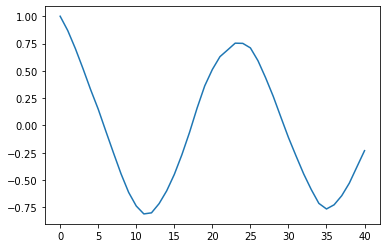

In [12]:
plt.plot(acf(blue,unbiased=True))

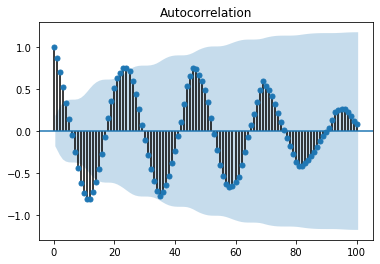

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(blue,lags=100,unbiased=True);

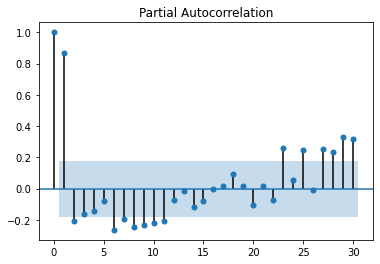

In [14]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(blue, lags = 30);

## Volumes exploration

## Cleanance

In [15]:
import pyodbc
import pandas as pd
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
connStr = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=bipro02\\adminbi;DATABASE=Prices;Trusted_Connection=yes')
cursor = connStr.cursor()

qry = "SELECT * FROM [Prices].[dbo].[volumes]"
df_volumes = pd.read_sql(qry, connStr)

In [16]:
df_volumes.head()

,ID,Product,Country,Region,Trade_Type,Trade_Country,Category,Package,Transport,Campaign,Campaign_wk,Date_volume,Measure,Volume,Updated
0,1,BLUEBERRIES,EU,,Import,CL,std,std,na,2016,23,2016-06-06,KG,0.0,2020-07-30 18:01:38.640
1,2,BLUEBERRIES,EU,,Import,MA,std,std,na,2016,47,2016-11-21,KG,0.0,2020-07-30 18:01:38.640
2,3,BLUEBERRIES,EU,,Import,PL,std,std,na,2016,18,2016-05-02,KG,0.0,2020-07-30 18:01:38.640
3,4,BLUEBERRIES,EU,,Import,PT,std,std,na,2016,42,2016-10-17,KG,0.0,2020-07-30 18:01:38.640
4,5,BLUEBERRIES,EU,,Import,ZA,std,std,na,2016,13,2016-03-28,KG,0.0,2020-07-30 18:01:38.640


In [17]:
df_volumes.shape

(155034, 15)

In [18]:
df_volumes[df_volumes['Volume']!=0].shape

(134221, 15)

## EU example

In [55]:
df_volumes_es = df_volumes[(df_volumes['Country']=='EU') & (df_volumes['Trade_Country']=='ES')]
df_volumes_es = df_volumes_es[['Date_volume','Volume']]
df_volumes_es.set_index('Date_volume',inplace=True)
df_volumes_es.sort_index(inplace=True)
df_volumes_es.index = df_volumes_es.index.astype('datetime64[ns]') 
df_volumes_es.head()

,Volume
Date_volume,
2015-12-28,0.0
2016-01-04,0.0
2016-01-11,0.0
2016-01-18,0.0
2016-01-25,0.0


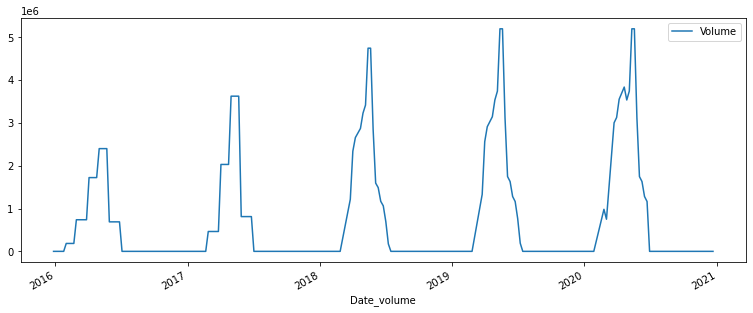

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting blue_weeks, without interpolation as it is our real data
fig, ax = plt.subplots(figsize= (13,5))
df_volumes_es.plot(ax=ax);import numpy as np

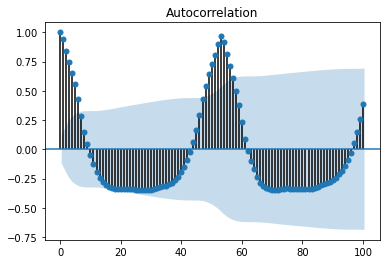

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_volumes_es,lags=100,unbiased=True);

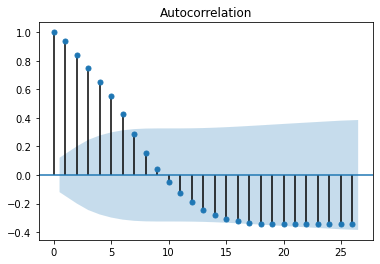

In [58]:
plot_acf(df_volumes_es,lags=26,unbiased=True);

## All countries example

In [59]:
df_volumes_total = df_volumes[['Date_volume','Volume']].groupby('Date_volume').agg('sum')
#df_volumes_total.set_index('Date_ref',inplace=True)
#df_volumes_total.sort_index(inplace=True)
df_volumes_total.index = df_volumes_total.index.astype('datetime64[ns]') 
df_volumes_total.head()

,Volume
Date_volume,
2000-01-01,3.447302e+05
2000-01-02,4.581283e+05
2000-01-03,1.174804e+06
2000-01-04,1.179340e+06
2000-01-05,7.529633e+05


In [60]:
df_volumes_total.head()

,Volume
Date_volume,
2000-01-01,3.447302e+05
2000-01-02,4.581283e+05
2000-01-03,1.174804e+06
2000-01-04,1.179340e+06
2000-01-05,7.529633e+05


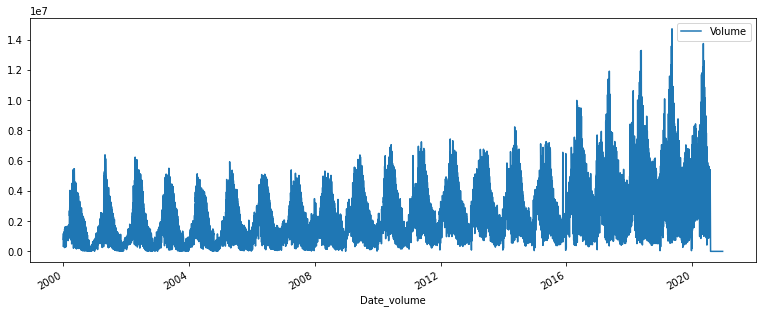

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting blue_weeks, without interpolation as it is our real data
fig, ax = plt.subplots(figsize= (13,5))
df_volumes_total.plot(ax=ax);import numpy as np

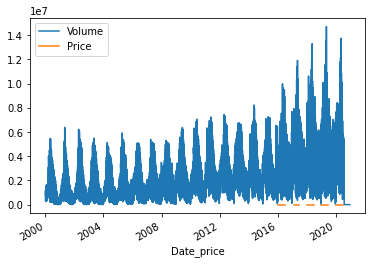

In [62]:
ax = df_volumes_total.plot()
blue_weeks.plot(ax=ax)

In [63]:
df_volumes_total[(df_volumes_total.index.year>2015) & (df_volumes_total.index.year<2020)][0:208]

,Volume
Date_volume,
2016-01-01,2.404040e+05
2016-01-02,3.120716e+06
2016-01-03,1.891480e+06
2016-01-04,3.873679e+06
2016-01-05,2.567333e+06
...,...
2016-07-22,4.377166e+06
2016-07-23,4.041508e+06
2016-07-24,8.300740e+05


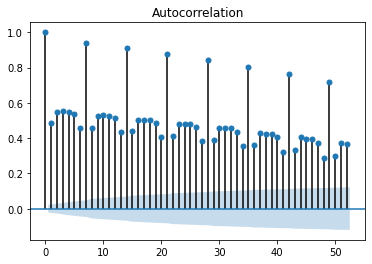

In [67]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_volumes_total,lags=52,unbiased=True);

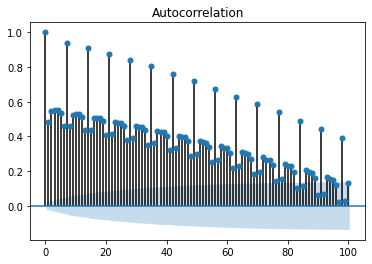

In [71]:
plot_acf(df_volumes_total,lags=100,unbiased=True);